<a href="https://colab.research.google.com/github/winlight13/semi_project/blob/main/%EC%9D%B4%EC%8A%B9%ED%98%B8_semi_%EC%97%B0%EB%8F%84%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_0905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코로나 19 전 후 국내 소비 트렌트 분석 및 물가 동향

In [ ]:
# 데이터 전처리를 위한 패키지
import pandas as pd
import numpy as np
# 데이터 시각화를 위한 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### 한글 폰트 설정(나눔 폰트)

In [ ]:
# 설정 후에도 한글 오류 발생시 코드 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
plt.style.use('dark_background')

# I. 데이터
- 서울 열린 데이터 광장
- http://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do#
- 서울시 우리마을가게 상권분석서비스(상권-추정매출)
  - 서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2022년.csv
  - 서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv
  - 서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.csv
  - 서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.csv

### 1-1 데이터 확인

In [ ]:
# 데이터 가져오기
df = pd.read_csv('/content/drive/MyDrive/semi/total.csv', encoding='utf-8', index_col=0)
# 2017, 2018 년도 데이터 삭제
A = df[df['기준_년_코드'] == 2017].index
df = df.drop(A, axis='index').reset_index().iloc[:,1:]

In [ ]:
# 데이터 첫 5행 확인
df.head()

In [ ]:
# 데이터 마지막 5행 확인
df.tail()

In [ ]:
# 데이터 정보 확인
df.info()

### 1-1.1 분석에 필요한 column 선정

* 요일별, 시간대별 매출 비율, 금액, 건수는 제거
* 


In [ ]:
# 결측치 확인
df.isnull().sum()

기준_년_코드            0
기준_분기_코드           0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
                  ..
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
점포수                0
Length: 80, dtype: int64

In [ ]:
df = df[['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수']]

In [ ]:
df['기준_년_분기'] = df['기준_년_코드'].astype(str) + '.' + df['기준_분기_코드'].astype(str) + 'Q'
df = df.reindex(['기준_년_코드', '기준_년_분기','서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수'], axis = 1)
df.head()

,기준_년_코드,기준_분기_코드,기준_년_분기,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수
0,2018,1,2018.1Q,CS100001,한식음식점,737919848.0,24095
1,2018,1,2018.1Q,CS100008,분식전문점,94169584.0,6209
2,2018,1,2018.1Q,CS100009,호프-간이주점,28406351.0,512
3,2018,1,2018.1Q,CS100010,커피-음료,302156.0,30
4,2018,1,2018.1Q,CS200001,일반교습학원,13519298.0,19


In [ ]:
# 컬럼 확인
df.columns

Index(['기준_년_코드', '기준_분기_코드', '기준_년_분기', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '분기당_매출_건수'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645246 entries, 0 to 645245
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준_년_코드      645246 non-null  int64  
 1   기준_분기_코드     645246 non-null  int64  
 2   기준_년_분기      645246 non-null  object 
 3   서비스_업종_코드    645246 non-null  object 
 4   서비스_업종_코드_명  645246 non-null  object 
 5   분기당_매출_금액    645246 non-null  float64
 6   분기당_매출_건수    645246 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 34.5+ MB


In [ ]:
#외식
list1 = ["CS100001","CS100002","CS100003","CS100004","CS100005","CS100006","CS100007","CS100008","CS100009","CS100010"]
#교육
list2 = ["CS200001","CS200002","CS200003"]
#의료
#list3 = ["CS200006","CS200007","CS200008"] 치과 한의원 -> 서비스
list3 = ["CS200006"]
#유흥
list4 = ["CS200016","CS200019","CS200037"]
#유통
list5 = ["CS300001","CS300002","CS300043"]
#문화레저
list6 = ["CS200005","CS200017","CS200024"]
#서비스
list7 = ["CS200007","CS200008", "CS200025","CS200026","CS200028","CS200029","CS200030","CS200031","CS200032","CS200033","CS200034","CS200036"]

def set_category(code):  # df["서비스_업종_코드"] 의 값이 인수로 전달됨
    if code in list1:
        return "외식"
    elif code in list2: 
        return "교육"
    elif code in list3: 
        return "의료"    
    elif code in list4: 
        return "유흥"   
    elif code in list5: 
        return "유통"    
    elif code in list6: 
        return "문화레저"         
    elif code in list7: 
        return "서비스"    
    else:
        return "소매"      
    
df["서비스_분류"] = df["서비스_업종_코드"].apply(set_category) # 시리즈 , 행기준
df = df.reindex(['기준_년_코드','기준_년_분기','서비스_업종_코드', '서비스_업종_코드_명', '서비스_분류', 
                 '분기당_매출_금액', '분기당_매출_건수',], axis = 1)
df.head()

,기준_년_코드,기준_년_분기,서비스_업종_코드,서비스_업종_코드_명,서비스_분류,분기당_매출_금액,분기당_매출_건수
0,2018,2018.1Q,CS100001,한식음식점,외식,737919848.0,24095
1,2018,2018.1Q,CS100008,분식전문점,외식,94169584.0,6209
2,2018,2018.1Q,CS100009,호프-간이주점,외식,28406351.0,512
3,2018,2018.1Q,CS100010,커피-음료,외식,302156.0,30
4,2018,2018.1Q,CS200001,일반교습학원,교육,13519298.0,19


In [ ]:
print(df.서비스_분류.unique())
print(df.서비스_분류.nunique())

['외식' '교육' '유흥' '문화레저' '서비스' '유통' '소매' '의료']
8


[Text(0, 0, '-5,000,000'),
 Text(0, 0, '0'),
 Text(0, 0, '5,000,000'),
 Text(0, 0, '10,000,000'),
 Text(0, 0, '15,000,000'),
 Text(0, 0, '20,000,000'),
 Text(0, 0, '25,000,000'),
 Text(0, 0, '30,000,000'),
 Text(0, 0, '35,000,000')]

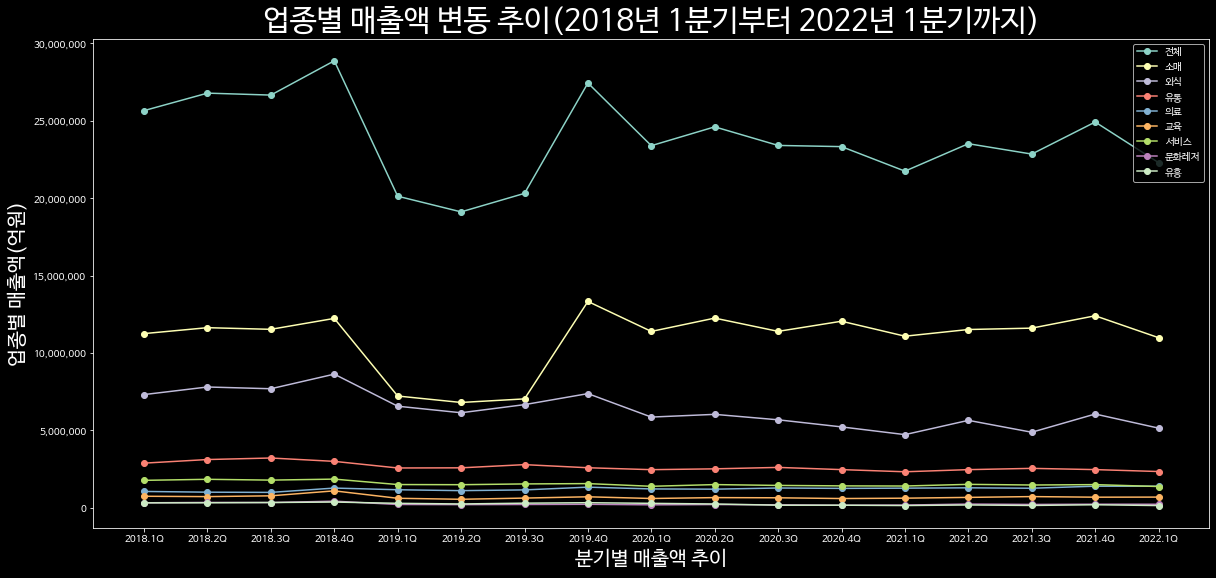

In [ ]:
# data
data_0 = df.groupby("기준_년_분기").sum() # total
data_1 = df[df['서비스_분류']=='소매'].groupby("기준_년_분기").sum()
data_2 = df[df['서비스_분류']=='외식'].groupby("기준_년_분기").sum()
data_3 = df[df['서비스_분류']=='유통'].groupby("기준_년_분기").sum()
data_4 = df[df['서비스_분류']=='의료'].groupby("기준_년_분기").sum()
data_5 = df[df['서비스_분류']=='교육'].groupby("기준_년_분기").sum()
data_6 = df[df['서비스_분류']=='서비스'].groupby("기준_년_분기").sum()
data_7 = df[df['서비스_분류']=='문화레저'].groupby("기준_년_분기").sum()
data_8 = df[df['서비스_분류']=='유흥'].groupby("기준_년_분기").sum()

# plot
fig = plt.figure(figsize=(20,9))
ax = fig.subplots()
ax.plot(data_0.index,  data_0['분기당_매출_금액'], label = '전체', marker='o')
ax.plot(data_1.index,  data_1['분기당_매출_금액'], label = '소매', marker='o')
ax.plot(data_2.index,  data_2['분기당_매출_금액'], label = '외식', marker='o')
ax.plot(data_3.index,  data_3['분기당_매출_금액'], label = '유통', marker='o')
ax.plot(data_4.index,  data_4['분기당_매출_금액'], label = '의료', marker='o')
ax.plot(data_5.index,  data_5['분기당_매출_금액'], label = '교육', marker='o')
ax.plot(data_6.index,  data_6['분기당_매출_금액'], label = '서비스', marker='o')
ax.plot(data_7.index,  data_7['분기당_매출_금액'], label = '문화레저', marker='o')
ax.plot(data_8.index,  data_8['분기당_매출_금액'], label = '유흥', marker='o')
ax.legend(loc='upper right')

ax.set_ylabel('업종별 매출액(억원)', fontsize = 20)
ax.set_xlabel('분기별 매출액 추이', fontsize = 20)
ax.set_title('업종별 매출액 변동 추이(2018년 1분기부터 2022년 1분기까지)', fontsize = 30)

current_values = plt.gca().get_yticks() / 1000000 # 억단위로 표현
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

[Text(0, 0, '-20,000'),
 Text(0, 0, '0'),
 Text(0, 0, '20,000'),
 Text(0, 0, '40,000'),
 Text(0, 0, '60,000'),
 Text(0, 0, '80,000'),
 Text(0, 0, '100,000'),
 Text(0, 0, '120,000')]

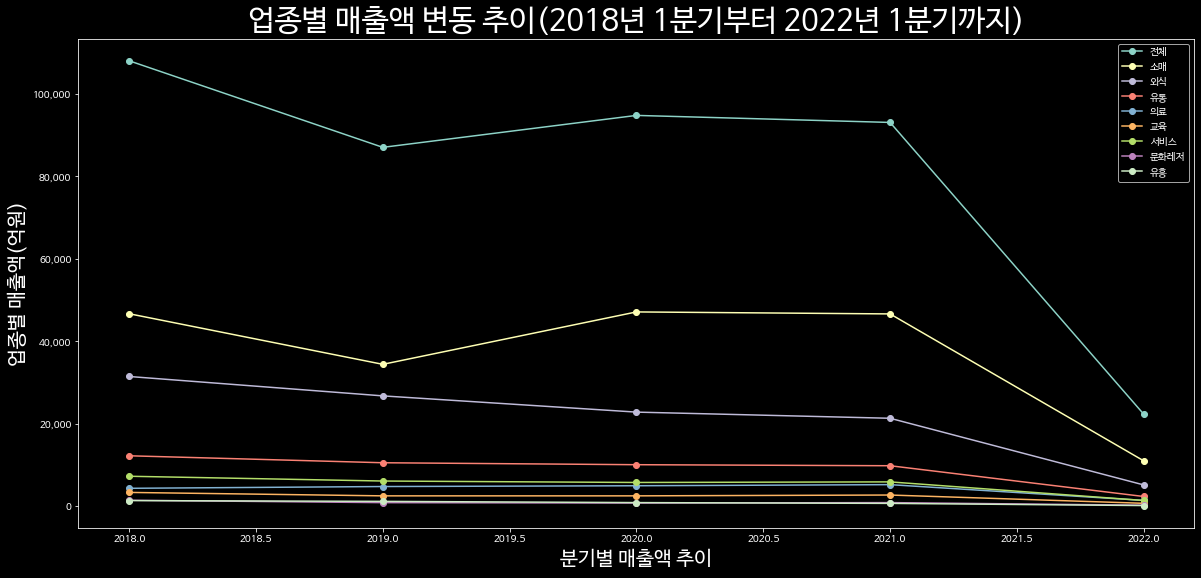

In [ ]:
## 년도별 매출액 평균 -> 잘 안그려짐

# data
data_0 = df.groupby("기준_년_코드").sum() # total
data_1 = df[df['서비스_분류']=='소매'].groupby("기준_년_코드").sum()
data_2 = df[df['서비스_분류']=='외식'].groupby("기준_년_코드").sum()
data_3 = df[df['서비스_분류']=='유통'].groupby("기준_년_코드").sum()
data_4 = df[df['서비스_분류']=='의료'].groupby("기준_년_코드").sum()
data_5 = df[df['서비스_분류']=='교육'].groupby("기준_년_코드").sum()
data_6 = df[df['서비스_분류']=='서비스'].groupby("기준_년_코드").sum()
data_7 = df[df['서비스_분류']=='문화레저'].groupby("기준_년_코드").sum()
data_8 = df[df['서비스_분류']=='유흥'].groupby("기준_년_코드").sum()

# plot
fig = plt.figure(figsize=(20,9))
ax = fig.subplots()
ax.plot(data_0.index,  data_0['분기당_매출_금액'], label = '전체', marker='o')
ax.plot(data_1.index,  data_1['분기당_매출_금액'], label = '소매', marker='o')
ax.plot(data_2.index,  data_2['분기당_매출_금액'], label = '외식', marker='o')
ax.plot(data_3.index,  data_3['분기당_매출_금액'], label = '유통', marker='o')
ax.plot(data_4.index,  data_4['분기당_매출_금액'], label = '의료', marker='o')
ax.plot(data_5.index,  data_5['분기당_매출_금액'], label = '교육', marker='o')
ax.plot(data_6.index,  data_6['분기당_매출_금액'], label = '서비스', marker='o')
ax.plot(data_7.index,  data_7['분기당_매출_금액'], label = '문화레저', marker='o')
ax.plot(data_8.index,  data_8['분기당_매출_금액'], label = '유흥', marker='o')
ax.legend(loc='upper right')

ax.set_ylabel('업종별 매출액(억원)', fontsize = 20)
ax.set_xlabel('분기별 매출액 추이', fontsize = 20)
ax.set_title('업종별 매출액 변동 추이(2018년 1분기부터 2022년 1분기까지)', fontsize = 30)

current_values = plt.gca().get_yticks() / 1000000000 # 억단위로 표현
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

[Text(0, 0, '-200'),
 Text(0, 0, '0'),
 Text(0, 0, '200'),
 Text(0, 0, '400'),
 Text(0, 0, '600'),
 Text(0, 0, '800'),
 Text(0, 0, '1,000'),
 Text(0, 0, '1,200'),
 Text(0, 0, '1,400'),
 Text(0, 0, '1,600'),
 Text(0, 0, '1,800')]

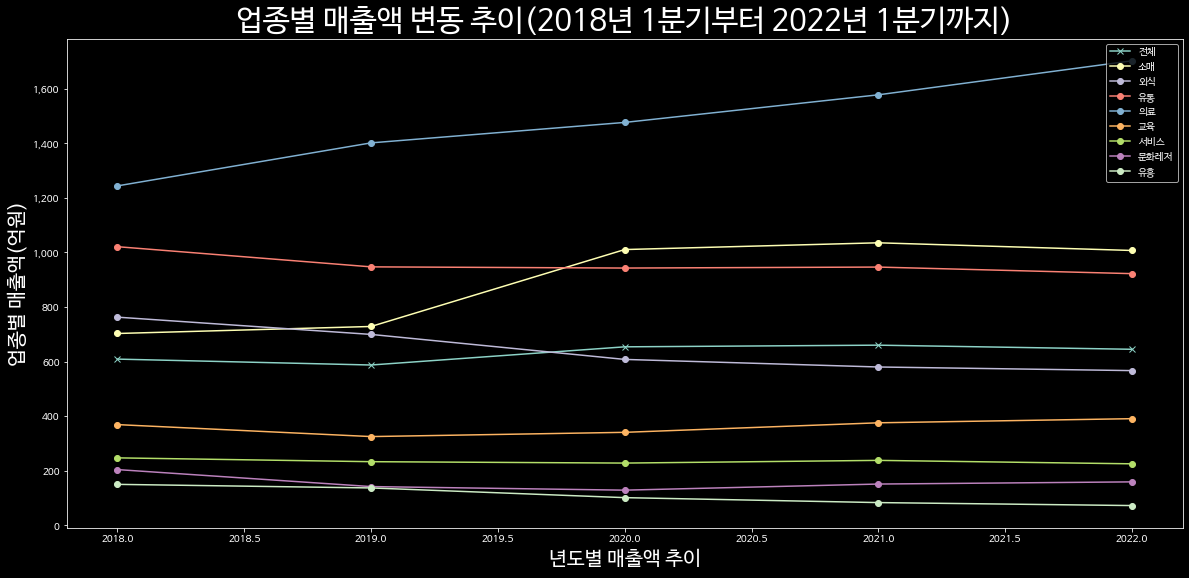

In [ ]:
# data
data_0 = df.groupby("기준_년_코드").mean() # total
data_1 = df[df['서비스_분류']=='소매'].groupby("기준_년_코드").mean()
data_2 = df[df['서비스_분류']=='외식'].groupby("기준_년_코드").mean()
data_3 = df[df['서비스_분류']=='유통'].groupby("기준_년_코드").mean()
data_4 = df[df['서비스_분류']=='의료'].groupby("기준_년_코드").mean()
data_5 = df[df['서비스_분류']=='교육'].groupby("기준_년_코드").mean()
data_6 = df[df['서비스_분류']=='서비스'].groupby("기준_년_코드").mean()
data_7 = df[df['서비스_분류']=='문화레저'].groupby("기준_년_코드").mean()
data_8 = df[df['서비스_분류']=='유흥'].groupby("기준_년_코드").mean()

# plot
fig = plt.figure(figsize=(20,9))
ax = fig.subplots()
ax.plot(data_0.index,  data_0['분기당_매출_금액'], label = '전체', marker='x')
ax.plot(data_1.index,  data_1['분기당_매출_금액'], label = '소매', marker='o')
ax.plot(data_2.index,  data_2['분기당_매출_금액'], label = '외식', marker='o')
ax.plot(data_3.index,  data_3['분기당_매출_금액'], label = '유통', marker='o')
ax.plot(data_4.index,  data_4['분기당_매출_금액'], label = '의료', marker='o')
ax.plot(data_5.index,  data_5['분기당_매출_금액'], label = '교육', marker='o')
ax.plot(data_6.index,  data_6['분기당_매출_금액'], label = '서비스', marker='o')
ax.plot(data_7.index,  data_7['분기당_매출_금액'], label = '문화레저', marker='o')
ax.plot(data_8.index,  data_8['분기당_매출_금액'], label = '유흥', marker='o')
ax.legend(loc='upper right')

ax.set_ylabel('업종별 매출액(억원)', fontsize = 20)
ax.set_xlabel('년도별 매출액 추이', fontsize = 20)
ax.set_title('업종별 매출액 변동 추이(2018년 1분기부터 2022년 1분기까지)', fontsize = 30)

current_values = plt.gca().get_yticks() / 1000000 # 억단위로 표현
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [ ]:
ax.plot(data_0.index,  data_0['분기당_매출_금액'], label = '전체', marker='x')
plt.show()

In [ ]:
data_0['분기당_매출_금액']
print(data_0)

            분기당_매출_금액     분기당_매출_건수
기준_년_코드                            
2018     6.094181e+08  25497.450063
2019     5.878110e+08  26321.074048
2020     6.543906e+08  25616.961699
2021     6.605020e+08  25081.270028
2022     6.454033e+08  23911.190985


In [ ]:
print(df.분기당_매출_금액.groupby(df.기준_년_코드).mean())
print(df.분기당_매출_금액.groupby(df.기준_년_분기).mean())

기준_년_코드
2018    6.094181e+08
2019    5.878110e+08
2020    6.543906e+08
2021    6.605020e+08
2022    6.454033e+08
Name: 분기당_매출_금액, dtype: float64
기준_년_분기
2018.1Q    5.763728e+08
2018.2Q    6.029910e+08
2018.3Q    6.060420e+08
2018.4Q    6.524641e+08
2019.1Q    5.376392e+08
2019.2Q    5.222414e+08
2019.3Q    5.482622e+08
2019.4Q    7.434060e+08
2020.1Q    6.431067e+08
2020.2Q    6.756786e+08
2020.3Q    6.480368e+08
2020.4Q    6.506152e+08
2021.1Q    6.136646e+08
2021.2Q    6.632902e+08
2021.3Q    6.491606e+08
2021.4Q    7.168883e+08
2022.1Q    6.454033e+08
Name: 분기당_매출_금액, dtype: float64


In [ ]:
data_0 = df.groupby("기준_년_코드").mean() # total
data_0

,분기당_매출_금액,분기당_매출_건수
기준_년_코드,,
2018,6.094181e+08,25497.450063
2019,5.878110e+08,26321.074048
2020,6.543906e+08,25616.961699
2021,6.605020e+08,25081.270028
2022,6.454033e+08,23911.190985


In [ ]:
data_1 = df[df['서비스_분류']=='소매'].groupby("기준_년_코드").mean()
data_1

,분기당_매출_금액,분기당_매출_건수
기준_년_코드,,
2018,7.032487e+08,14223.316003
2019,7.289462e+08,16895.947584
2020,1.010712e+09,20604.863472
2021,1.035464e+09,21279.104124
2022,1.007341e+09,21491.585511


In [ ]:
data_1 = df[df['서비스_분류']=='소매'].groupby("기준_년_분기").sum()
data_1

,기준_년_코드,분기당_매출_금액,분기당_매출_건수
기준_년_분기,,,
2018.1Q,33634006,1.124968e+13,223256434
2018.2Q,33638042,1.163204e+13,237858787
2018.3Q,33147668,1.152607e+13,228657377
2018.4Q,33412026,1.223096e+13,253503496
2019.1Q,23995815,7.217716e+12,176417218
2019.2Q,23489046,6.801660e+12,179281376
2019.3Q,23602110,7.032505e+12,185453539
2019.4Q,24131088,1.332595e+13,255677651
2020.1Q,23617840,1.139012e+13,233245438


In [ ]:
data_0 = df.groupby("기준_년_코드").sum() # total
data_0

,분기당_매출_금액,분기당_매출_건수
기준_년_코드,,
2018,1.079602e+14,4516949771
2019,8.697957e+13,3894781969
2020,9.472238e+13,3708029589
2021,9.301850e+13,3532195258
2022,2.229352e+13,825940359
